<a href="https://colab.research.google.com/github/PurpTzy/AB-Purp/blob/main/GAMING_DATASET_FINALS_DATA_SCIENCE_GENRE_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialize and import the neccessary libraries

In [ ]:
import pandas as pd
import numpy as np

#Dataset

In [ ]:
df= pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/gaming_dataset.csv')
df.head()


,game_id,player_id,game_title,game_rating,game_demo_graphics,genre,age,gender,playing_time,study_time,review_category,game_review,preferred_genre
0,c321ee48-19f3-4850-bd4d-9cf821c10de0,d343c995-1e40-4da6-968c-f184cc69ffe5,Extended well-modulated software,1,Ultra,Action,20,Male,3.65,4.17,negative,Boring disappointed awful boring hate boring h...,Action
1,746e9eb2-bbb4-42ec-97c2-253bd39e65e5,0a782e42-128d-40a7-b14b-b24f3c66531e,Polarized multi-state open architecture,10,High,RPG,16,Non-binary,5.03,4.13,positive,Love good great.,Strategy
2,e69d344a-bc1d-483b-9411-03cad6478526,ec8598b7-afc0-4f98-a9a1-9045cd6d6e3c,Down-sized fresh-thinking ability,8,Medium,RPG,18,Non-binary,5.26,3.74,neutral,Ordinary ordinary decent mediocre fair fine de...,RPG
3,7e782b81-c1d0-4b7c-8479-3ef48a2bb5cd,0e8d132a-64af-46b3-8327-9a47f74c997f,Enterprise-wide methodical neural-net,6,Low,RPG,15,Female,3.92,5.29,neutral,Fair acceptable ordinary.,RPG
4,56bbd733-286f-4cff-b33d-a1a3923be0b7,46f75001-19e3-4677-83a0-be3acbb86399,Fully-configurable asymmetric analyzer,5,Medium,Action,18,Female,2.89,6.16,positive,Fantastic love good great awesome nice good.,Action


#EDA

In [ ]:
df.describe()

,game_rating,age,playing_time,study_time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.493000,18.062000,3.397500,5.583290
std,2.901788,1.979918,1.380346,1.397749
min,1.000000,15.000000,0.000000,1.930000
25%,3.000000,16.000000,2.407500,4.610000
50%,6.000000,18.000000,3.480000,5.500000
75%,8.000000,20.000000,4.400000,6.660000
max,10.000000,21.000000,6.000000,8.000000


##Any Insights on this Matter?

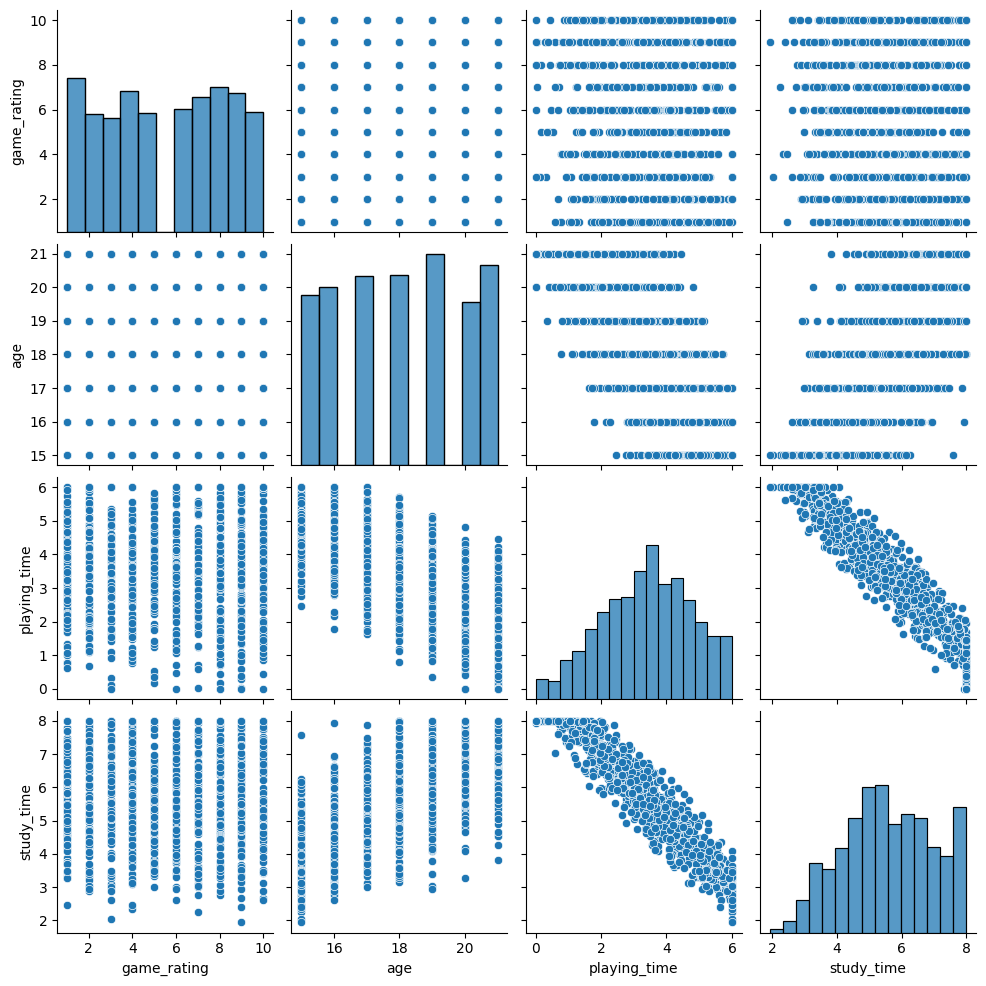

In [ ]:
import seaborn as sns

sns.pairplot(df)

##What Can you Say About the Plots and Distributions?

#MODELLING

##Genre Recommendation Using K-Nearest Neighbors

###Initialization

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

###Load Data Set

In [ ]:
df = pd.read_csv('gaming_dataset.csv')

###Feature Engineering

In [ ]:
label_encoders = {}
categorical_columns = ['genre', 'preferred_genre', 'gender']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

scaler = StandardScaler()
numerical_columns = ['game_rating', 'playing_time', 'age']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df[['game_rating', 'playing_time', 'study_time', 'age', 'gender']]
y = df['preferred_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

###Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.165
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.21      0.17        43
           1       0.18      0.05      0.08        40
           2       0.18      0.16      0.17        37
           3       0.11      0.11      0.11        19
           4       0.25      0.29      0.27        35
           5       0.12      0.15      0.14        26

    accuracy                           0.17       200
   macro avg       0.16      0.16      0.15       200
weighted avg       0.17      0.17      0.16       200



##What Can you Say About the Plots and Distributions?